<a href="https://colab.research.google.com/github/lucbijl/sociophysics/blob/main/Sociophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp

In [2]:
data_1min=pd.read_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily=pd.read_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')

In [ ]:
data_1min['timestamp']=pd.to_datetime(data_1min['timestamp'])
data_1min['return']=np.log(data['close']/data['open'])
data_daily['timestamp']=pd.to_datetime(data_daily['timestamp'])


In [ ]:
window=pd.to_timedelta('0 days 00:30:00')
for k in range(len(data_1min['timestamp'])):
  idx=(data_1min['timestamp']>(data_1min.loc[k,'timestamp']-window))&(data_1min['timestamp']<(data_1min.loc[k,'timestamp']+window));
  data_1min.loc[k,'volatility']=np.std(data_1min.loc[idx,'return']);

In [ ]:
data_1min.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')

In [ ]:
data_1min.sort_values(by=['timestamp'],inplace=True)
data_daily.sort_values(by=['timestamp'],inplace=True)
data_1min.reset_index(inplace=True)
data_daily.reset_index(inplace=True)

In [ ]:
data_1min.drop(columns=['index','Unnamed: 0'],inplace=True)
data_daily.drop(columns=['index','Unnamed: 0'],inplace=True)

In [ ]:
index=(data_1min['timestamp']<pd.to_datetime('2022-11-11 15:00:00'))&(data_1min['timestamp']>pd.to_datetime('2022-11-10 14:00:00'))
data_1min_filter=data_1min.loc[index]
data_1min_filter.reset_index(inplace=True)

In [9]:
data_daily.head()

,Unnamed: 0,timestamp,open,high,low,close,volume


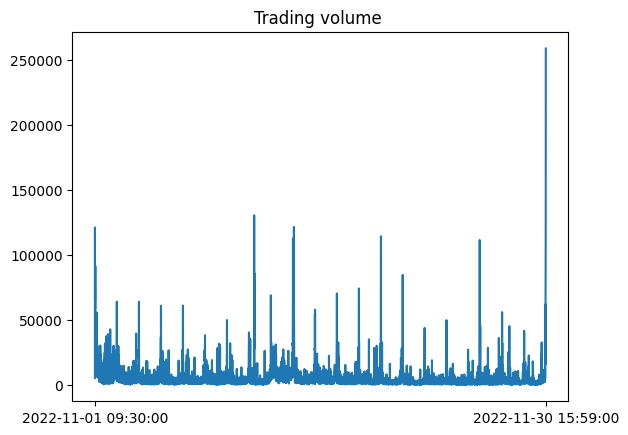

In [11]:
plt.plot(data_1min['volume']);
id_ticks=[0,len(data_1min['timestamp'])-1];
id_labels=data_1min.loc[id_ticks,'timestamp'];
plt.xticks(ticks=id_ticks,labels=id_labels);
plt.title('Trading volume ');

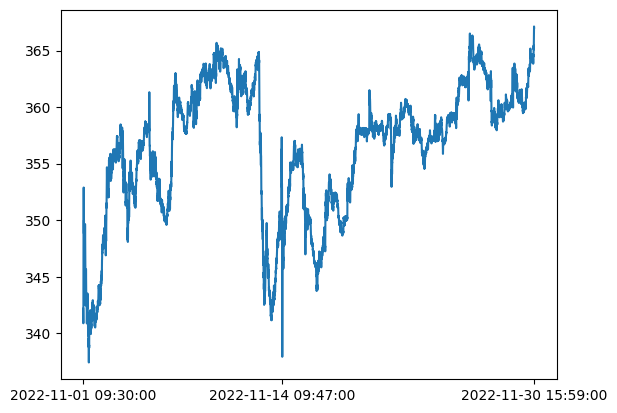

In [ ]:
plt.plot(data_1min['open'])
plt.xticks(ticks=id_ticks,labels=id_labels);

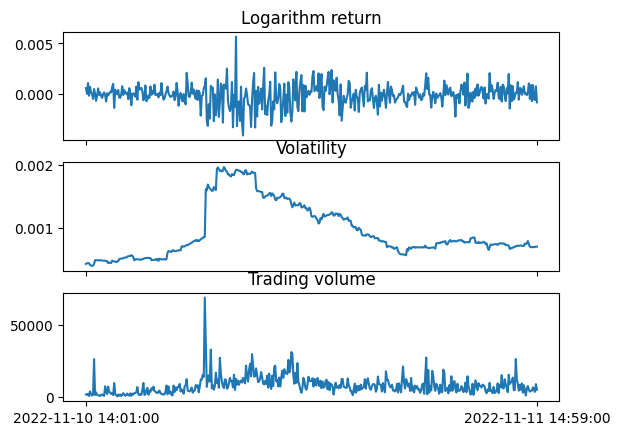

In [ ]:
fig,axs=plt.subplots(3,1,sharex=True);
axs[0].plot(data_1min_filter['return']);
axs[1].plot(data_1min_filter['volatility']);
axs[2].plot(data_1min_filter['volume'])
axs[2].set_xticks([0, len(data_1min_filter)-1]);
axs[2].set_xticklabels(data_1min_filter.loc[[0,len(data_1min_filter)-1],'timestamp'].astype('string'));
axs[0].set_title('Logarithm return');
axs[1].set_title('Volatility');
axs[2].set_title('Trading volume');
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_1.jpg')

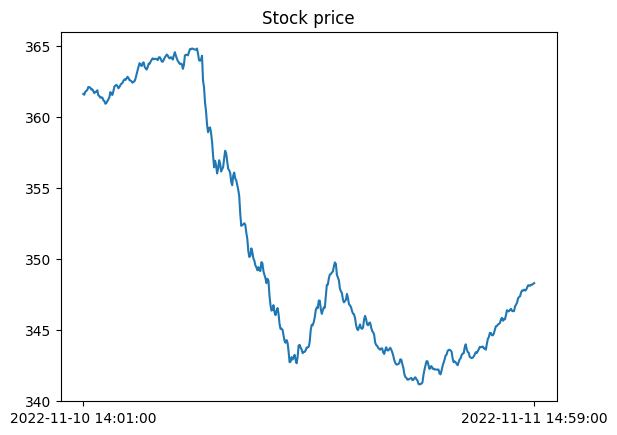

In [ ]:
plt.plot((data_1min_filter['open']+data_1min_filter['close'])/2);
plt.xticks(ticks=[0, len(data_1min_filter)-1],labels=data_1min_filter.loc[[0,len(data_1min_filter)-1],'timestamp'].astype('string'));
plt.title('Stock price');
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_2.jpg')